In [147]:
import numpy as np
from graphviz import Digraph
import math

In [128]:
class State:
    def __init__(self,id_state, connection, type_state = "none"):
        self.id_state = id_state
        self.connection = connection
        self.type_state = type_state

In [129]:
states = [State(1,[(2,0.02),(3,0.005)]), State(2,[(1,0.3), (3, 0.2)]), State(3, [(1,0.02),(2,0.4)])]

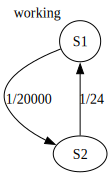

In [151]:
def visualization(states):
    dot = Digraph(comment="Model Markowa", graph_attr={"nodesep": "1.0", "ranksep": "0.8"})
    for s in states:
        id_str = str(s.id_state)
        if(s.type_state != "none"):
            dot.node(id_str, "S"+str(s.id_state), shape="circle", xlabel = s.type_state)
        else:
            dot.node(id_str, "S"+str(s.id_state))
        for ver in s.connection:
            dot.edge(id_str, str(int(ver[0])), label="1/"+str(int(math.pow(ver[1],-1))))
    return dot
visualization(states)

In [152]:
def matrix_Q(states):
    states_index = [st.id_state for st in states]
    len_states = len(states)
    mat = np.zeros((len_states, len_states))
    for st in states:
        index_st = states_index.index(st.id_state)
        for ver in st.connection:
            index_st_2 = states_index.index(ver[0])
            mat[index_st, index_st_2] = ver[1]
    for i in range(len_states):
        sum_row = 0
        for j in range(len_states):
            sum_row += mat[i][j]
        mat[i][i] = -sum_row
    return mat
matrix_Q(states)

array([[-5.00000000e-05,  5.00000000e-05],
       [ 4.16666667e-02, -4.16666667e-02]])

In [153]:
def stationary_distribution(states):
    Q = matrix_Q(states)
    len_states = len(states)
    Q[:,-1] = np.ones(len_states)
    vec = np.zeros(len_states)
    vec[-1] = 1
    return np.matmul(vec, np.linalg.inv(Q))

In [154]:
stationary_distribution(states)

array([0.99880144, 0.00119856])

In [155]:
states = [State(1,[(2,1/20000)], "working"), State(2,[(1,1/24)])]

In [156]:
stationary_distribution(states)

array([0.99880144, 0.00119856])

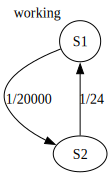

In [157]:
visualization(states)